In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**LOAD TRAINING DATA**

In [2]:
train_df = pd.read_csv("../data/jobfair_train.csv")
train_df.head()

,season,club_id,league_id,dynamic_payment_segment,cohort_season,avg_age_top_11_players,avg_stars_top_11_players,avg_stars_top_14_players,avg_training_factor_top_11_players,days_active_last_28_days,...,registration_country,registration_platform_specific,league_match_won_count_last_28_days,training_count_last_28_days,global_competition_level,tokens_spent_last_28_days,tokens_stash,rests_stash,morale_boosters_stash,league_rank
0,173,6042825,2912348,2) Minnow,134,25,5.255151,4.483009,1.778801,25,...,Portugal,Flash FB Canvas,24,435,11.0,598,245,186,818,2
1,173,9620967,2912140,2) Minnow,28,23,4.962521,4.785648,-0.002687,28,...,Turkey,Android Phone,19,58,7.0,269,0,35,24,2
2,173,6045474,2912933,4) Whale,136,23,11.105782,10.511133,0.628794,28,...,Belgium,Flash FB Canvas,26,116,8.0,23180,369,444,4933,1
3,173,14187773,2910371,0) NonPayer,2,21,4.164848,4.023486,0.551904,12,...,Malaysia,Android Phone,11,22,2.0,41,43,213,126,6
4,173,13694853,2907632,0) NonPayer,5,22,3.031939,2.926029,0.690544,0,...,Italy,iOS Phone,9,0,4.0,0,16,100,147,10


In [3]:
train_df.shape

(55314, 23)

In [4]:
train_df.describe()

,season,club_id,league_id,cohort_season,avg_age_top_11_players,avg_stars_top_11_players,avg_stars_top_14_players,avg_training_factor_top_11_players,days_active_last_28_days,league_match_watched_count_last_28_days,session_count_last_28_days,playtime_last_28_days,league_match_won_count_last_28_days,training_count_last_28_days,global_competition_level,tokens_spent_last_28_days,tokens_stash,rests_stash,morale_boosters_stash,league_rank
count,55314.0,5.531400e+04,5.531400e+04,55314.000000,55314.000000,55314.000000,55314.000000,55314.000000,55314.000000,55314.000000,55314.000000,5.531400e+04,55314.000000,55314.000000,37763.000000,55314.000000,55314.000000,55314.000000,55314.000000,55314.000000
mean,173.0,1.210977e+07,2.909804e+06,23.409372,23.718661,4.533516,4.344776,0.584372,12.357089,3.623170,63.432169,2.955178e+07,12.411813,61.107694,3.901014,121.393897,113.133077,283.083523,307.085964,7.500000
std,0.0,3.384016e+06,2.102140e+03,42.009274,2.206240,1.204753,1.177068,0.178090,11.849102,5.906055,101.831670,5.233892e+07,6.403013,188.288285,2.625576,842.775529,3183.550398,789.250959,823.362486,4.031165
min,173.0,2.750000e+02,2.904743e+06,1.000000,18.000000,1.451697,1.354905,-1.287736,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,-4975.000000,-169.000000,0.000000,1.000000
25%,173.0,1.151105e+07,2.907961e+06,2.000000,22.000000,3.691136,3.500062,0.479571,1.000000,0.000000,1.000000,7.364150e+04,8.000000,0.000000,1.000000,0.000000,11.000000,41.000000,52.000000,4.000000
50%,173.0,1.392822e+07,2.910038e+06,4.000000,23.000000,4.481376,4.311590,0.561158,7.000000,0.000000,16.000000,6.230431e+06,12.000000,11.000000,3.000000,38.000000,29.000000,88.000000,118.000000,7.500000
75%,173.0,1.424454e+07,2.911697e+06,17.000000,25.000000,5.217394,5.021726,0.648180,27.000000,5.000000,89.000000,3.768711e+07,17.000000,63.000000,6.000000,107.000000,73.000000,243.000000,281.000000,11.000000
max,173.0,1.451477e+07,2.912940e+06,172.000000,33.000000,23.716073,20.434876,5.164494,28.000000,26.000000,1365.000000,1.340479e+09,26.000000,7443.000000,11.000000,120233.000000,744202.000000,32767.000000,32767.000000,14.000000


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55314 entries, 0 to 55313
Data columns (total 23 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   season                                   55314 non-null  int64  
 1   club_id                                  55314 non-null  int64  
 2   league_id                                55314 non-null  int64  
 3   dynamic_payment_segment                  55314 non-null  object 
 4   cohort_season                            55314 non-null  int64  
 5   avg_age_top_11_players                   55314 non-null  int64  
 6   avg_stars_top_11_players                 55314 non-null  float64
 7   avg_stars_top_14_players                 55314 non-null  float64
 8   avg_training_factor_top_11_players       55314 non-null  float64
 9   days_active_last_28_days                 55314 non-null  int64  
 10  league_match_watched_count_last_28_days  55314

In [6]:
train_df.isna().sum()

season                                         0
club_id                                        0
league_id                                      0
dynamic_payment_segment                        0
cohort_season                                  0
avg_age_top_11_players                         0
avg_stars_top_11_players                       0
avg_stars_top_14_players                       0
avg_training_factor_top_11_players             0
days_active_last_28_days                       0
league_match_watched_count_last_28_days        0
session_count_last_28_days                     0
playtime_last_28_days                          0
registration_country                           0
registration_platform_specific                 0
league_match_won_count_last_28_days            0
training_count_last_28_days                    0
global_competition_level                   17551
tokens_spent_last_28_days                      0
tokens_stash                                   0
rests_stash         

**FIX nan VALUES**
- "*global_competition_level*" is only column with nan values
- nan values represents users who have opted out of the competition
- given that the possible values ​​of the column "*global_competition_level*" are from 1 to 11 nan values can be replaced with 0

In [7]:
train_df["global_competition_level"].fillna(0, inplace=True)

In [8]:
train_df.isna().sum()

season                                     0
club_id                                    0
league_id                                  0
dynamic_payment_segment                    0
cohort_season                              0
avg_age_top_11_players                     0
avg_stars_top_11_players                   0
avg_stars_top_14_players                   0
avg_training_factor_top_11_players         0
days_active_last_28_days                   0
league_match_watched_count_last_28_days    0
session_count_last_28_days                 0
playtime_last_28_days                      0
registration_country                       0
registration_platform_specific             0
league_match_won_count_last_28_days        0
training_count_last_28_days                0
global_competition_level                   0
tokens_spent_last_28_days                  0
tokens_stash                               0
rests_stash                                0
morale_boosters_stash                      0
league_ran

**DROP UNINFORMATIVE FEATURES**
- "*season*" - same for all samples
- "*club_id*" and "*league_id*" - id values generaly have no predictive power 
- "*registration_country*" - to much different categories
- "*registration_platform_specific*" - no discriminatory power

In [12]:
len(train_df["league_id"].unique())

3951

In [13]:
# Every league has 14 players
len(train_df) / len(train_df["league_id"].unique())

14.0

In [14]:
len(train_df["registration_country"].unique())

186

In [15]:
len(train_df["registration_platform_specific"].unique())

11

In [16]:
train_df["registration_platform_specific"].unique()

array(['Flash FB Canvas', 'Android Phone', 'iOS Phone', 'Android Tablet',
       'iOS Tablet', 'UniversalWindows PC', 'WebGL FB Canvas',
       'WebGL TE Site', 'WebGL or Flash FB Canvas', 'Flash TE Site',
       'WebGL or Flash TE Site'], dtype=object)

In [17]:
train_df.groupby('registration_platform_specific')['league_rank'].mean()

registration_platform_specific
Android Phone               7.398198
Android Tablet              7.438136
Flash FB Canvas             8.364516
Flash TE Site               7.714286
UniversalWindows PC         7.907459
WebGL FB Canvas             7.823362
WebGL TE Site               7.216769
WebGL or Flash FB Canvas    6.589147
WebGL or Flash TE Site      6.823529
iOS Phone                   7.489794
iOS Tablet                  7.371499
Name: league_rank, dtype: float64

In [18]:
columns_to_drop = ["season", "club_id", "league_id", "registration_country", "registration_platform_specific"]

In [19]:
train_df.drop(columns_to_drop, axis=1, inplace=True)

In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55314 entries, 0 to 55313
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   dynamic_payment_segment                  55314 non-null  object 
 1   cohort_season                            55314 non-null  int64  
 2   avg_age_top_11_players                   55314 non-null  int64  
 3   avg_stars_top_11_players                 55314 non-null  float64
 4   avg_stars_top_14_players                 55314 non-null  float64
 5   avg_training_factor_top_11_players       55314 non-null  float64
 6   days_active_last_28_days                 55314 non-null  int64  
 7   league_match_watched_count_last_28_days  55314 non-null  int64  
 8   session_count_last_28_days               55314 non-null  int64  
 9   playtime_last_28_days                    55314 non-null  int64  
 10  league_match_won_count_last_28_days      55314

**TRANSFORM CATEGORICAL FEATURES**
- "*dynamic_payment_segment*" - Ordinal feature; ordinal encoding is sufficient

In [21]:
train_df["dynamic_payment_segment"].unique()

array(['2) Minnow', '4) Whale', '0) NonPayer', '1) ExPayer', '3) Dolphin'],
      dtype=object)

In [22]:
encoding_map = {
    '0) NonPayer': 0,
    '1) ExPayer': 1,
    '2) Minnow': 2,
    '3) Dolphin': 3,
    '4) Whale': 4
}

In [23]:
train_df["dynamic_payment_segment"] = train_df["dynamic_payment_segment"].map(encoding_map)

In [24]:
train_df["dynamic_payment_segment"].unique()

array([2, 4, 0, 1, 3])

In [121]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55314 entries, 0 to 55313
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   dynamic_payment_segment                  55314 non-null  int64  
 1   cohort_season                            55314 non-null  int64  
 2   avg_age_top_11_players                   55314 non-null  int64  
 3   avg_stars_top_11_players                 55314 non-null  float64
 4   avg_stars_top_14_players                 55314 non-null  float64
 5   avg_training_factor_top_11_players       55314 non-null  float64
 6   days_active_last_28_days                 55314 non-null  int64  
 7   league_match_watched_count_last_28_days  55314 non-null  int64  
 8   session_count_last_28_days               55314 non-null  int64  
 9   playtime_last_28_days                    55314 non-null  int64  
 10  league_match_won_count_last_28_days      55314

**VISUALIZATIONS**

<Axes: xlabel='dynamic_payment_segment', ylabel='league_rank'>

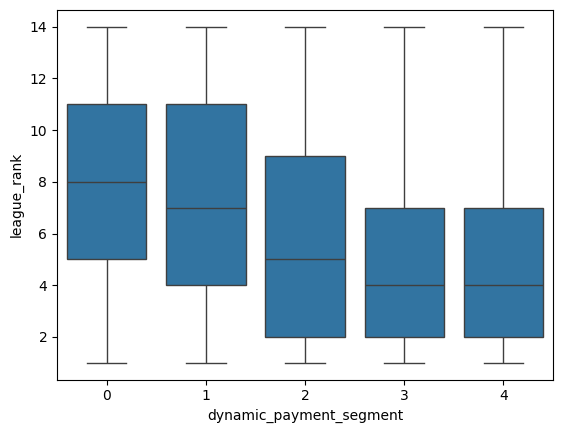

In [25]:
sns.boxplot(x='dynamic_payment_segment', y='league_rank', data=train_df)

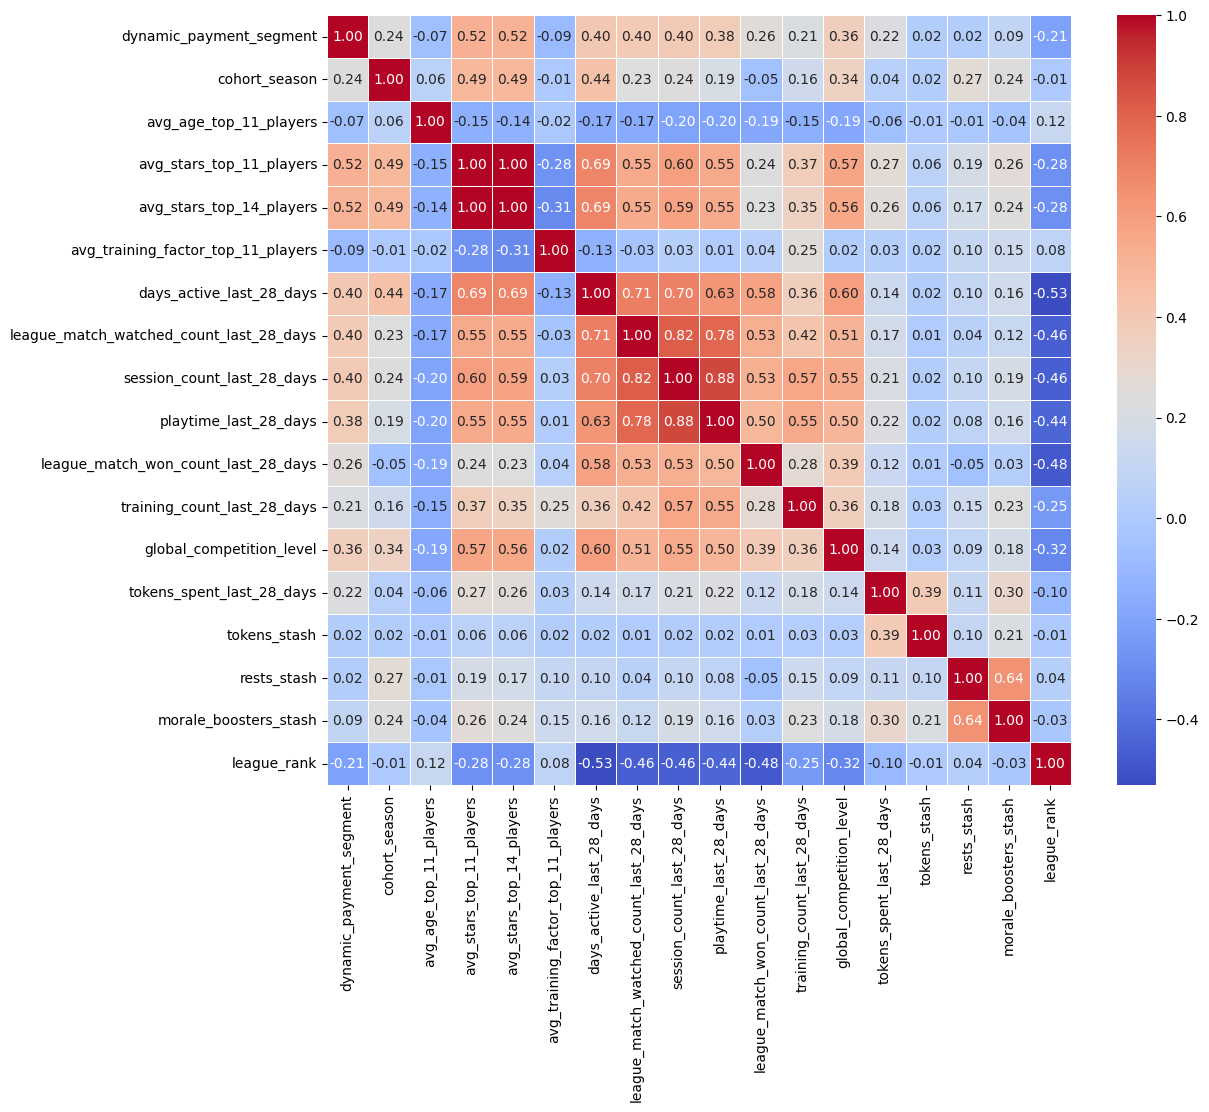

In [26]:
correlation_matrix = train_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.show()